# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

In [2]:
#importing the train dataset
patient_train  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/patient_treat_class/training_set_label.csv" )
patient_train.dtypes

HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX              object
SOURCE            int64
dtype: object

In [3]:
#importing the test dataset
patient_test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/patient_treat_class/testing_set_label.csv')

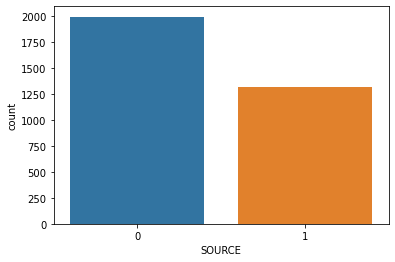

In [4]:
#checking for data imbalance
patient_test
sns.countplot(x="SOURCE",data=patient_train)

In [6]:
#Feature Engineering on the SEX Column
def f(r):
    if r == 'M':
        return 1
    else:
        return 0

patient_train.SEX = patient_train.SEX.apply(f)
patient_test.SEX = patient_test.SEX.apply(f)

In [9]:
patient_train.groupby('SOURCE').agg('count') #understanding the counts of 1s and 0s in the target feature==> Definitely imbalanced

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
SOURCE,,,,,,,,,,
0,1992,1992,1992,1992,1992,1992,1992,1992,1992,1992
1,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317


In [10]:
#code for undersampling

"""
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the minority class (1s) in a separate dataset.
minority_class = shuffled_df.loc[shuffled_df['target'] == 1]

#Randomly select 670 from the majority class (0s)
majority_class = shuffled_df.loc[shuffled_df['target'] == 0].sample(n=670,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([minority_class, majority_class])

#plot the dataset after the undersampling
sns.countplot('target', data=normalized_df)
plt.title('Balanced Classes')"""

"\n# Shuffle the Dataset.\nshuffled_df = df.sample(frac=1,random_state=4)\n\n# Put all the minority class (1s) in a separate dataset.\nminority_class = shuffled_df.loc[shuffled_df['target'] == 1]\n\n#Randomly select 20000 from the majority class (0s)\nmajority_class = shuffled_df.loc[shuffled_df['target'] == 0].sample(n=20000,random_state=42)\n\n# Concatenate both dataframes again\nnormalized_df = pd.concat([minority_class, majority_class])\n\n#plot the dataset after the undersampling\nsns.countplot('target', data=normalized_df)\nplt.title('Balanced Classes')"

In [11]:
#Defining the dependant and independant variables

X = patient_train.drop('SOURCE', axis = 1)
Y = patient_train['SOURCE']
#Y=np.log1p(Y)

In [12]:
#Using SMOTE for oversampling the minority class
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_sample(X, Y)

In [13]:
patient_train['SOURCE'].skew()

0.41693001124094026

In [14]:
#Splitting the train and test data and scaling respectively

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train, X_test,Y_train, Y_test=model_selection.train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [15]:
#spot check algorithms
"""import warnings
warnings.filterwarnings("ignore")"""

models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

#evaluate each model in turn
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results=model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" %  (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.697527 (0.020768)
LDA: 0.696270 (0.019606)
LDA: 0.696270 (0.019606)
KNN: 0.722631 (0.021306)
CART: 0.683428 (0.026400)
NB: 0.673365 (0.022717)
SVM: 0.745851 (0.026081)


In [16]:
#Selecting SVM For highest Accuracy
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train) 

Y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       415
           1       0.72      0.67      0.70       382

    accuracy                           0.72       797
   macro avg       0.72      0.72      0.72       797
weighted avg       0.72      0.72      0.72       797



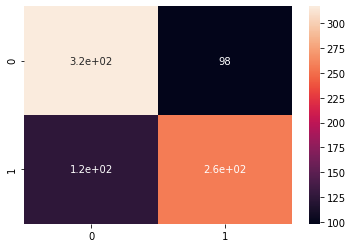

In [17]:
#Printing the classification report and the confusion Matrix
print(classification_report(Y_test,Y_pred))
cnf=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf,annot=True)

In [18]:
#Scaling the independant variable from the patient_train dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
Xt= patient_test
Xt=scaler.fit_transform(Xt)

In [20]:
#fitting the dependant and independant variables from the patienr_train dataset
X_resampled=scaler.fit_transform(X_resampled)
clf1 = svm.SVC(kernel='rbf')
clf1.fit(X_resampled, y_resampled)

ypred = clf.predict(Xt)

In [22]:
#string the output in the test dataset
patient_test["prediction"]=ypred

In [23]:
#creating a new dataframe for storing the predictions
o2=patient_test["prediction"]

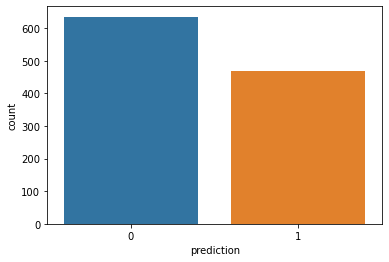

In [24]:
#Visualizing the Count of the output prediction
sns.countplot(x="prediction",data=patient_test)

In [25]:
#storing the output in the desireed csv format
o2.to_csv('patient_predictions.csv') #Storing in a CSV file